### Лабораторна робота №1, Сопронюк Юрій TI-92

**Варіант**: 21

**Модель**: Naive Bayes

**Dataset**: Boston house prices dataset

Підключаємо усі необхідні бібліотеки, які будуть використовуватися в цій лабораторній роботі. Для деяких бібліотек були додані коментарі

In [394]:
from sklearn.datasets import load_boston # Boston house prices dataset
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Naive Bayes (Gaussian)
import matplotlib.pyplot as plt # для візуалізації даних
import seaborn as sns # також для візуалізації даних
import pandas as pd # бібліотека, для зручнішої роботи з даними
import numpy as np

### Завантаження даних та перетворення їх в датасет

In [192]:
# завантажуємо датасет
boston = load_boston()

# перетворюємо дані в Dataframe
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names

 Інформацію по даному датасету можна переглянути за посиланням http://lib.stat.cmu.edu/datasets/boston
 #### Опис усіх колонок датасету:
 1. CRIM     per capita crime rate by town
 2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 3. INDUS    proportion of non-retail business acres per town
 4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 5. NOX      nitric oxides concentration (parts per 10 million)
 6. RM       average number of rooms per dwelling
 7. AGE      proportion of owner-occupied units built prior to 1940
 8. DIS      weighted distances to five Boston employment centres
 9. RAD      index of accessibility to radial highways
 10. TAX      full-value property-tax rate per \$10,000
 11. PTRATIO  pupil-teacher ratio by town
 12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 13. LSTAT    % lower status of the population
 14. MEDV     Median value of owner-occupied homes in \$1000's

### Огляд датасету та його колонок

In [293]:
# print the names of the 13 features
print (f"Features: {boston.feature_names}")
display(boston_pd)
print(f"Shape: {boston.data.shape}")

Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Shape: (506, 13)


### Оголошення вектора (feature vector) ознак і цільової змінної (target variable)
Naive Bayes працюэ лише з бінарними значеннями. В нашому датасеті, найкраще підходить колонка CHAS (1, якщо будинок граничить з річкою та 0 якщо ні)

In [353]:
X = boston_pd.drop(['CHAS'], axis=1)
y = boston_pd['CHAS']
display(X.head())
y

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

### Приклад теплової карти датасету з використанням Seaborn
Визначимо кореляційний зв'язок - зв'язок поміж ознаками, коли значенню однієї величини однієї ознаки відповідає значення іншої взаємопов'язаної з ним ознаки.

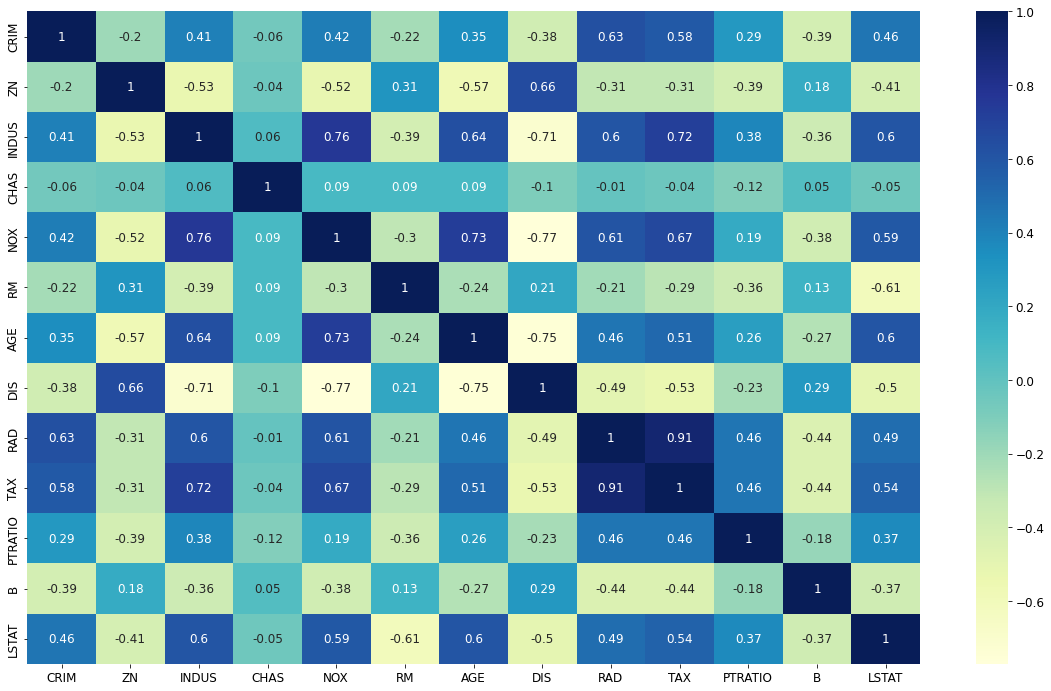

In [354]:
correlation_matrix = boston_pd.corr().round(2)
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

### Перевірка відсутніх значень для всіх змінних
З результату нижче видно, що в X_train і X_test немає пропущених значень.

In [371]:
display(X_train[:].isnull().sum())
X_test[:].isnull().sum()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### Розділення даних на окремі навчальні та тестові набори та тренування моделі

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# перевірка форми X_train та X_test
print(X_train.shape, X_test.shape)

# інстанціюємо модель
gnb = GaussianNB()

# тренуємо модель
gnb.fit(X_train, y_train)

(354, 12) (152, 12)


GaussianNB()

### Прогнозуємо результати та перевіряємо точність
Ми бачимо, що показник точності нашої моделі становить 0,7105, що є выдносно точно. Таким чином, ми можемо зробити висновок, що наша модель наївної класифікації Байєса Гаусса справляється з прогнозуванням міток класів.

In [365]:
from sklearn.metrics import accuracy_score
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7105


### ROC-крива
В цій кривій важливий показник AUC (area under ROC curve, площа під ROC-кривою) — площа, обмежена ROC-кривою і віссю частки помилкових позитивних класифікацій. Чим вище показник AUC, тим якісніше діє класифікатор, при цьому значення 0.5 демонструє непридатність обраного методу класифікації (відповідає звичайному вгадуванню).  

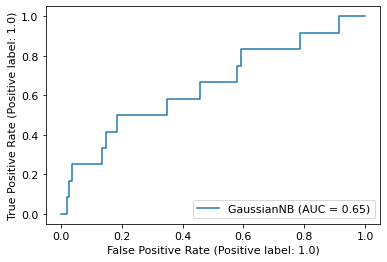

In [393]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gnb, X_test, y_test)  

**Confusion matrix** — це інструмент для узагальнення продуктивності алгоритму класифікації. **Confusion matrix** дасть нам чітке уявлення про продуктивність моделі класифікації та типи помилок, створених моделлю. Він дає нам зведення правильних і неправильних прогнозів, розбитих за кожною категорією. Анотація оформлена у вигляді таблиці.

**True Positives (TP)** – Справжні позитивні результати, які виникають коли ми передбачаємо, що спостереження належить до певного класу, і спостереження насправді належить до цього класу.

**True Negatives (TN)** – Справжні негативи результати виникають, які виникають коли ми передбачаємо, що спостереження не належить до певного класу і воно насправді не належить йому.

**False Positives (FP)** – помилкові позитивні результати виникають, коли ми передбачаємо, що спостереження належить до певного класу, але спостереження насправді не належить до цього класу. Цей тип помилки називається __помилкою I типу__.

**False Negatives (FN)** – помилкові негативні результати виникають, коли ми передбачаємо, що спостереження не належить до певного класу, але спостереження насправді належить до цього класу. Це дуже серйозна помилка, і вона називається помилкою типу II.

- **True Positives** (Actual Positive:1 and Predict Positive:1) - 102
- **True Negatives** (Actual Negative:0 and Predict Negative:0) - 6
- **False Positives** (Actual Negative:0 but Predict Positive:1) - 38 (I тип помилки)
- **False Negatives** (Actual Positive:1 but Predict Negative:0) - 6 (II тип помилки)

Отже, confusion matrix показує 102 + 6 = 108 правильних прогнозів і 38 + 6 = 44 неправильних прогнозів (не найкращий результат)


Confusion matrix
 [[102  38]
 [  6   6]]

True Positives(TP) =  102
True Negatives(TN) =  6
False Positives(FP) =  38
False Negatives(FN) =  6


<AxesSubplot:>

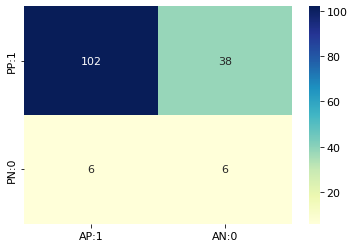

In [389]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['AP:1', 'AN:0'], 
                                 index=['PP:1', 'PN:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Гістограма прогнозованої ймовірності
Ми бачимо, що наведена нижче гістограма має значний позитивний перекіс.  
Перший стовпець говорить нам, що існує приблизно 82-83 спостережень з імовірністю від 0.0 до 0.1, чия будівля розміщена не біля річки

Text(0, 0.5, 'Частота')

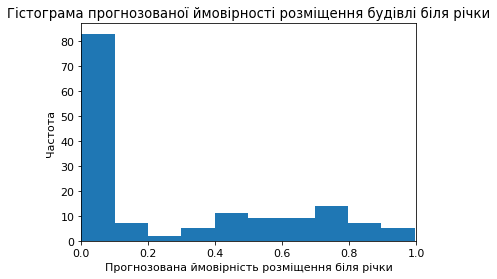

In [386]:
# вибирає клас з найбільшою вірогідністю
y_pred1 = gnb.predict_proba(X_test)[:, 1]


plt.rcParams['font.size'] = 11
plt.hist(y_pred1, bins = 10)
plt.title('Гістограма прогнозованої ймовірності розміщення будівлі біля річки')

# межа по осі x
plt.xlim(0,1)

plt.xlabel('Прогнозована ймовірність розміщення біля річки')
plt.ylabel('Частота')